In [43]:
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("simcel-6pk70-1jk5iqdp-train_v9rqX0R.csv")
print(df.shape)
df.head(10)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [45]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [46]:
# Get columns data type
def get_columns_type(df):
    excluded = []
    cat_cols = [f for f in df.columns if (df[f].dtype == "object" and f not in excluded)]
    real_cols = [f for f in df.select_dtypes(include=[np.number]) if (f not in excluded)]
    bool_cols = [f for f in df.columns if (df[f].dtype == "bool" and f not in excluded)]
    return cat_cols, real_cols, bool_cols

cat_cols, real_cols, bool_cols = get_columns_type(df)
print(f"Cat cols: {cat_cols}\nReal_cols: {real_cols}\nBool_cols: {bool_cols}")

Cat cols: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Real_cols: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Bool_cols: []


In [47]:
# Check distinct values for each cat cols when item_weight is missing
cat_cols_with_year = cat_cols.copy()
cat_cols_with_year.append("Outlet_Establishment_Year") # because Outlet_Establishment_Year column might be treat as cat col.
for col in cat_cols_with_year:
    print(f"{col}: ", df[col].unique())

Item_Identifier:  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type:  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier:  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size:  ['Medium' nan 'High' 'Small']
Outlet_Location_Type:  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type:  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Outlet_Establishment_Year:  [1999 2009 1998 1987 1985 2002 2007 1997 2004]


- Column **Item_Fat_Content** have values "low fat", "reg" a little weird. That seem it"s alternative values of "Low Fat" "Regular". 

In [48]:
"""Check items (same Item_Identifier) have more than one Item_Fat_Content value"""
list_omega_fat_content = []
for item in df["Item_Identifier"].value_counts().index:
    fat_content = set(df[df["Item_Identifier"]==item]["Item_Fat_Content"].unique())
    if len(fat_content) > 1:
        if fat_content not in list_omega_fat_content:
            list_omega_fat_content.append(fat_content)
            print("Item_Identifier is {} have more than one Item_Fat_Content is {}".format(item, fat_content))

Item_Identifier is FDW13 have more than one Item_Fat_Content is {'Low Fat', 'low fat'}
Item_Identifier is FDD38 have more than one Item_Fat_Content is {'reg', 'Regular'}
Item_Identifier is DRE49 have more than one Item_Fat_Content is {'Low Fat', 'LF'}
Item_Identifier is NCJ30 have more than one Item_Fat_Content is {'Low Fat', 'low fat', 'LF'}


In [49]:
"""Replace all of them to offical values"""
df.loc[df["Item_Fat_Content"]=="reg", "Item_Fat_Content"] = "Regular"
df.loc[df["Item_Fat_Content"]=="LF", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"]=="low fat", "Item_Fat_Content"] = "Low Fat"

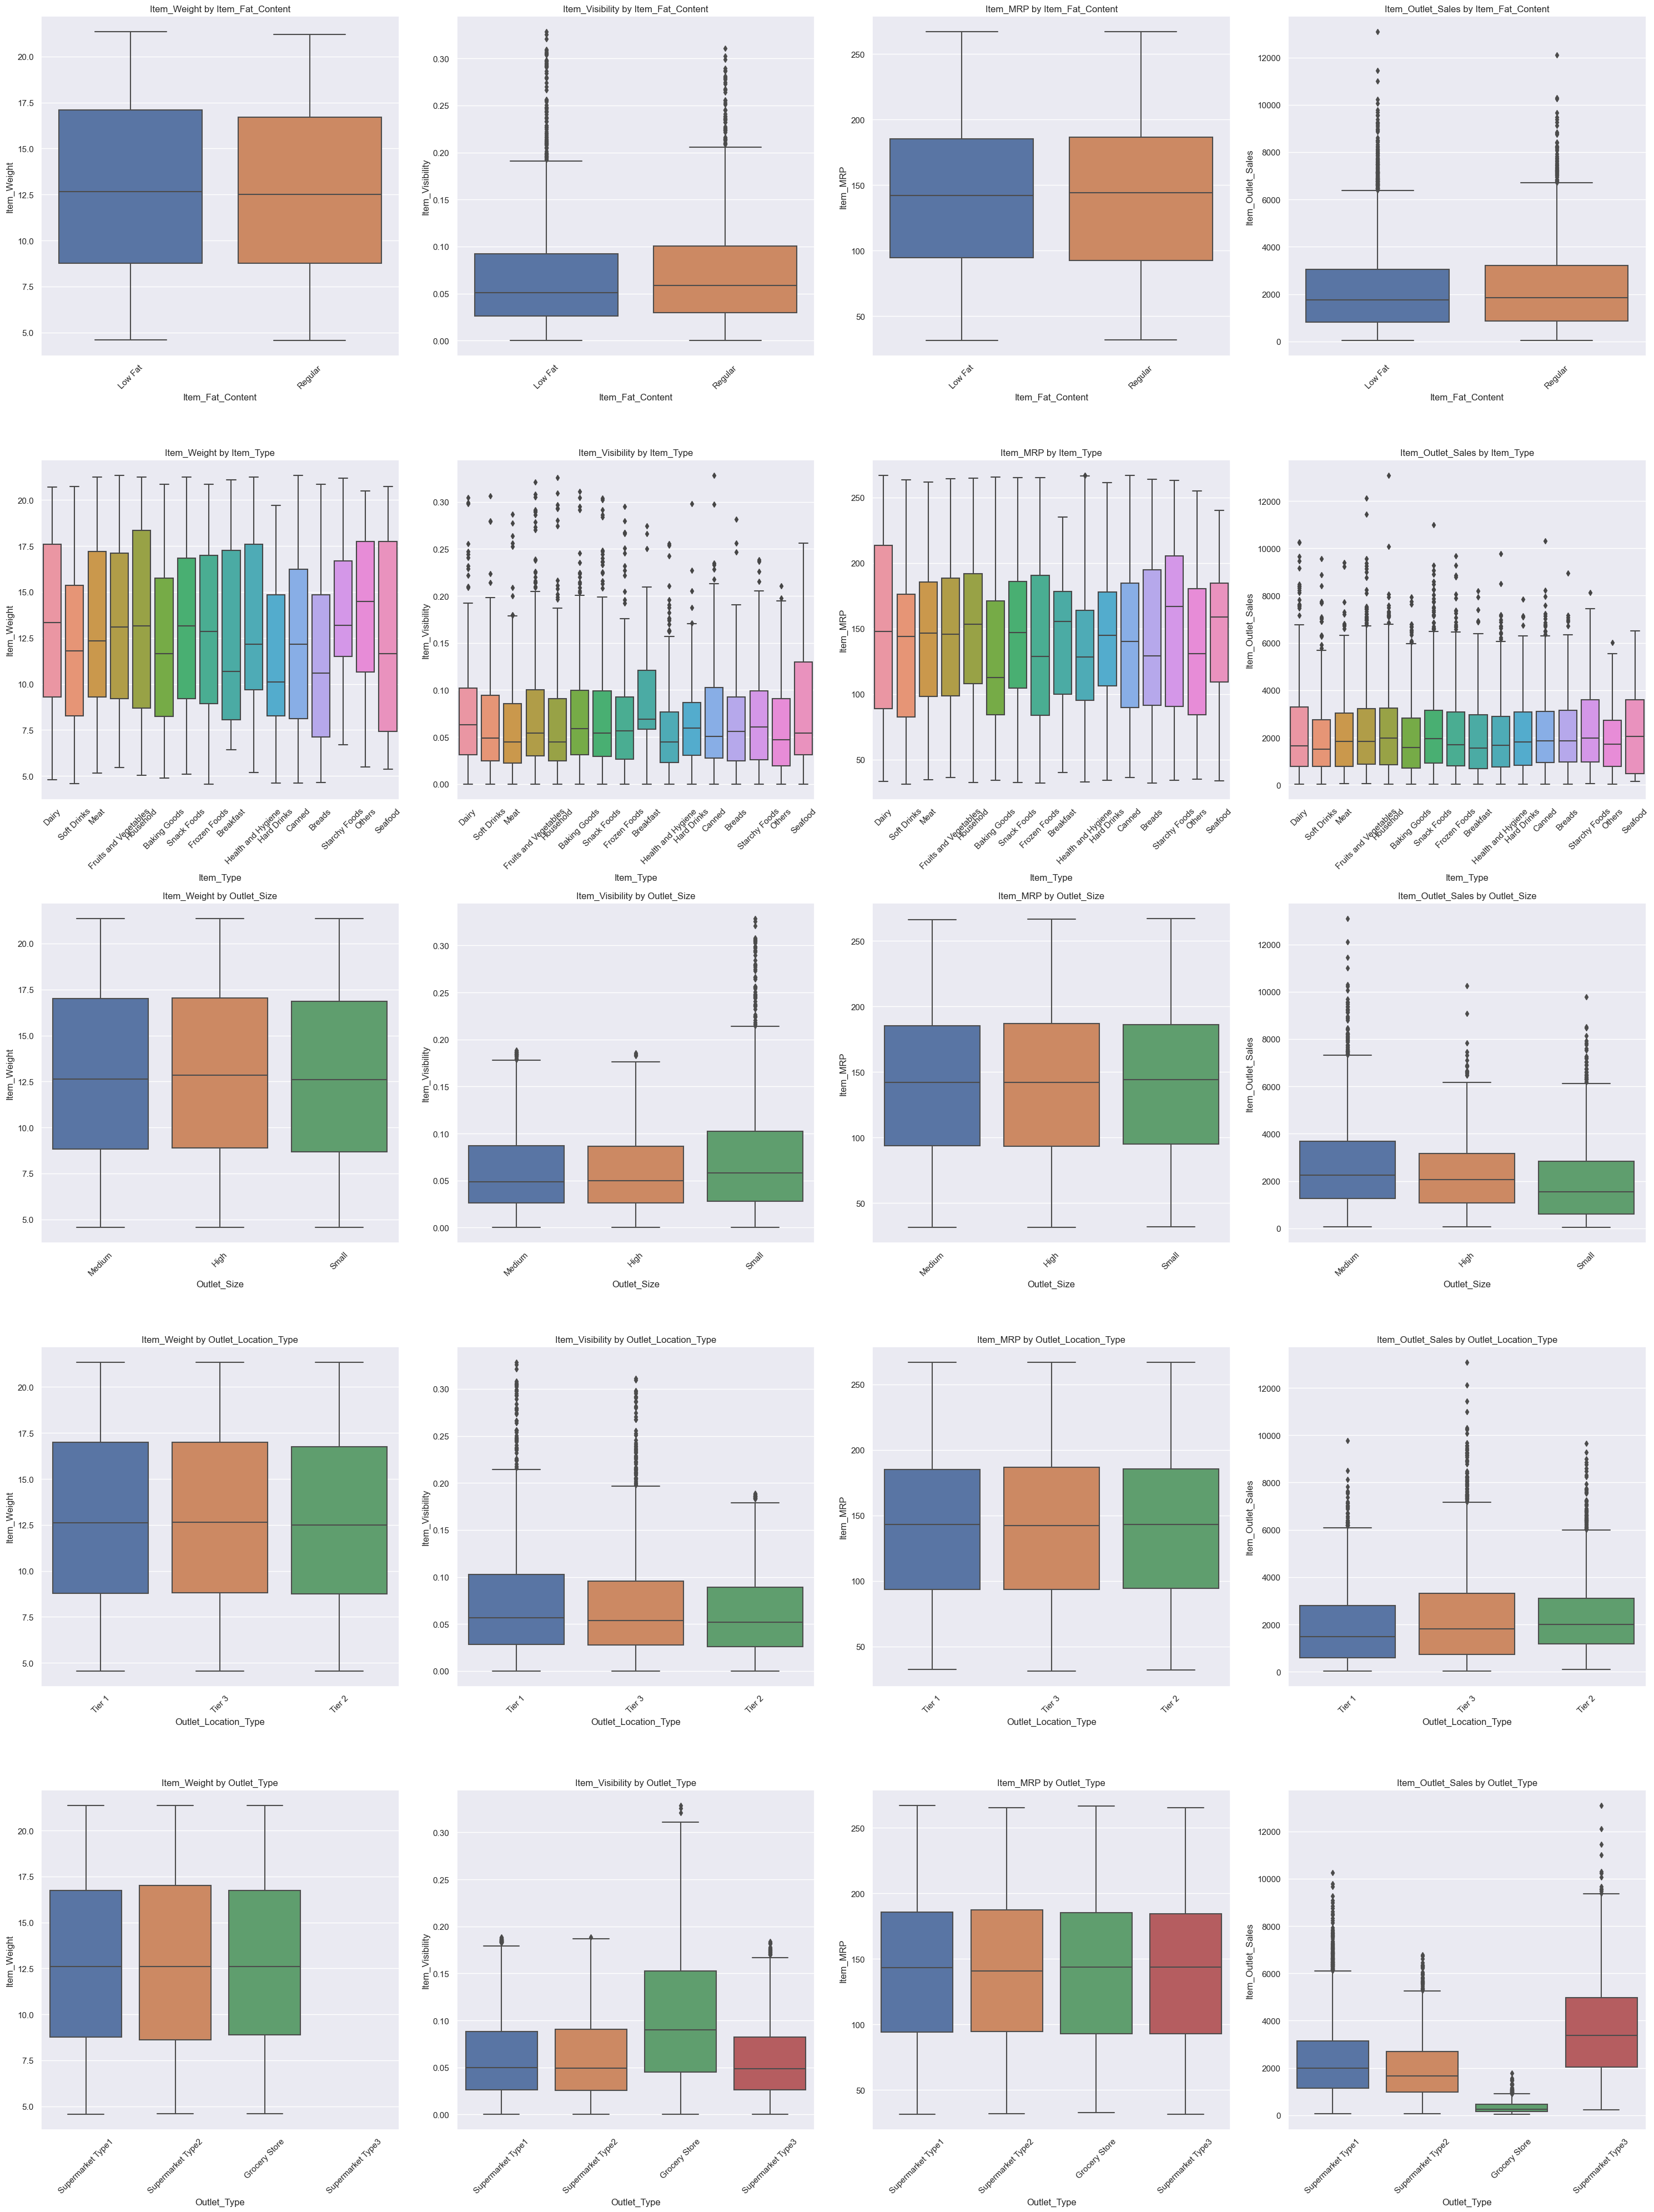

In [50]:
def plot_box_from_cat_to_quant(df_plot, interested_cat_cols, interested_real_cols):
    fig, axes = plt.subplots(ncols=len(interested_real_cols), nrows=len(interested_cat_cols), figsize=(30,40))
    for cat_index, cat_col in enumerate(interested_cat_cols):
        for real_index, real_column in enumerate(interested_real_cols):
            axis = axes[cat_index][real_index]
            sns.boxplot(x=cat_col, y=real_column, data=df_plot, ax=axis)
            axis.set_xticklabels(labels=axis.get_xticklabels(), rotation=45)
            axis.set_title(real_column + " by " + cat_col)
    plt.tight_layout()
    plt.show()

# Check relationship between C->Q
interested_cat_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
interested_real_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
plot_box_from_cat_to_quant(df, interested_cat_cols, interested_real_cols)

- **Outlet_Size** and **Item_Weight** are abnormal columns because they have signifcant number of null-value

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
#Check some corr of real values
df[["Item_Weight",
    "Item_Visibility",
    "Item_MRP",
    "Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Item_Outlet_Sales'}>]], dtype=object)

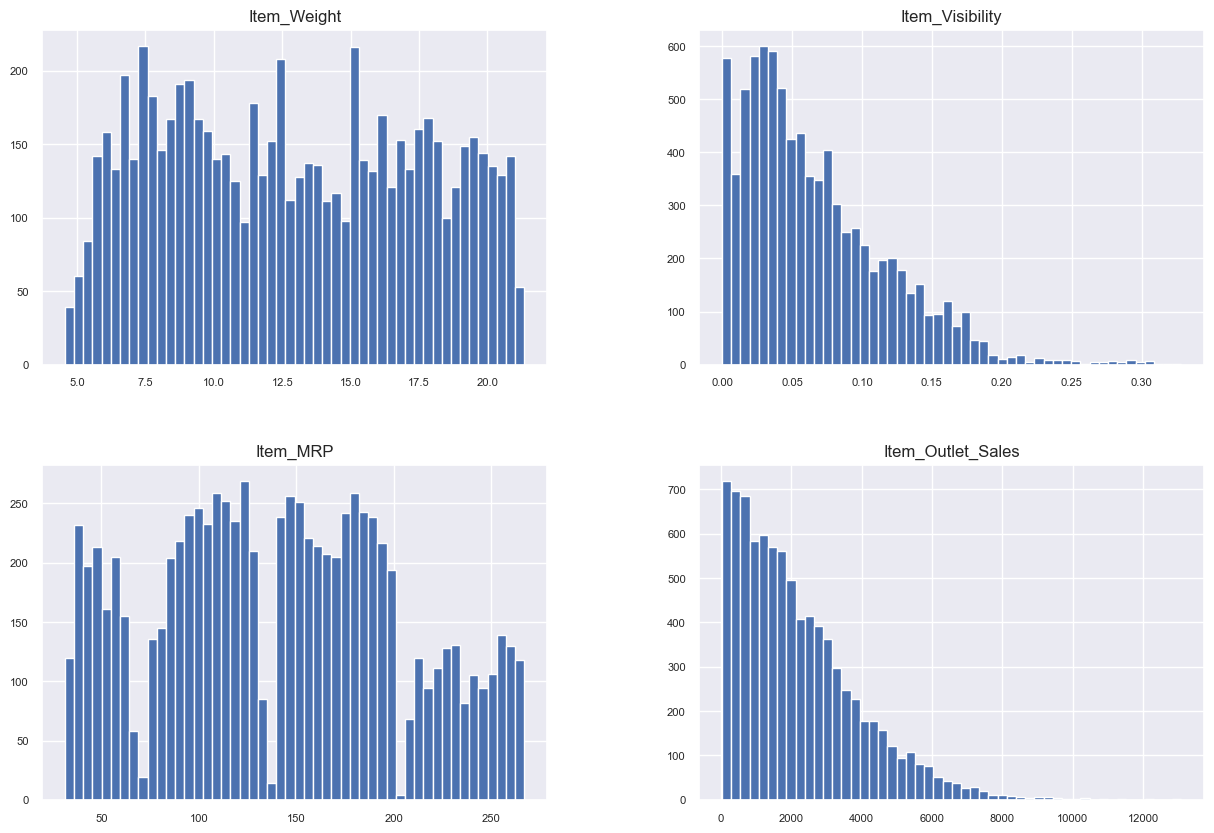

In [53]:
df[["Item_Weight",
    "Item_Visibility",
    "Item_MRP",
    "Item_Outlet_Sales"]].hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8)

### Check abnormal observation Outlet_Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

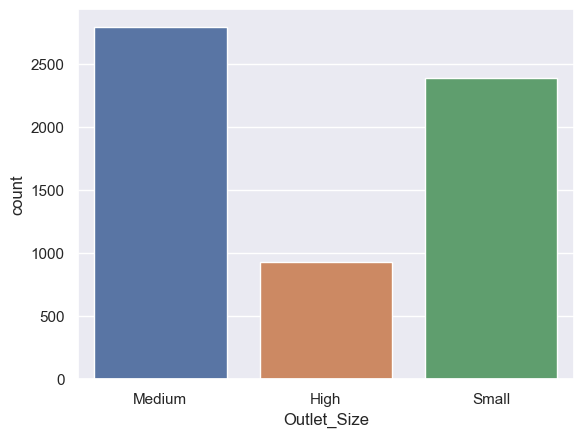

In [54]:
sns.countplot(x='Outlet_Size', data=df)

In [55]:
df_outlet_size_null = df[df["Outlet_Size"].isnull()]
col_unique_mapper = {}
print("Check Cat distinct values relevant to missing Outlet_size")
for col in cat_cols_with_year:
    print(f"{col}: ", df_outlet_size_null[col].unique())
    col_unique_mapper[col] = df_outlet_size_null[col].unique()
    

Check Cat distinct values relevant to missing Outlet_size
Item_Identifier:  ['FDX07' 'FDH17' 'FDU28' ... 'FDP21' 'NCQ42' 'FDW21']
Item_Fat_Content:  ['Regular' 'Low Fat']
Item_Type:  ['Fruits and Vegetables' 'Frozen Foods' 'Household' 'Dairy' 'Breads'
 'Health and Hygiene' 'Canned' 'Meat' 'Snack Foods' 'Soft Drinks'
 'Starchy Foods' 'Baking Goods' 'Others' 'Breakfast' 'Hard Drinks'
 'Seafood']
Outlet_Identifier:  ['OUT010' 'OUT045' 'OUT017']
Outlet_Size:  [nan]
Outlet_Location_Type:  ['Tier 3' 'Tier 2']
Outlet_Type:  ['Grocery Store' 'Supermarket Type1']
Outlet_Establishment_Year:  [1998 2002 2007]


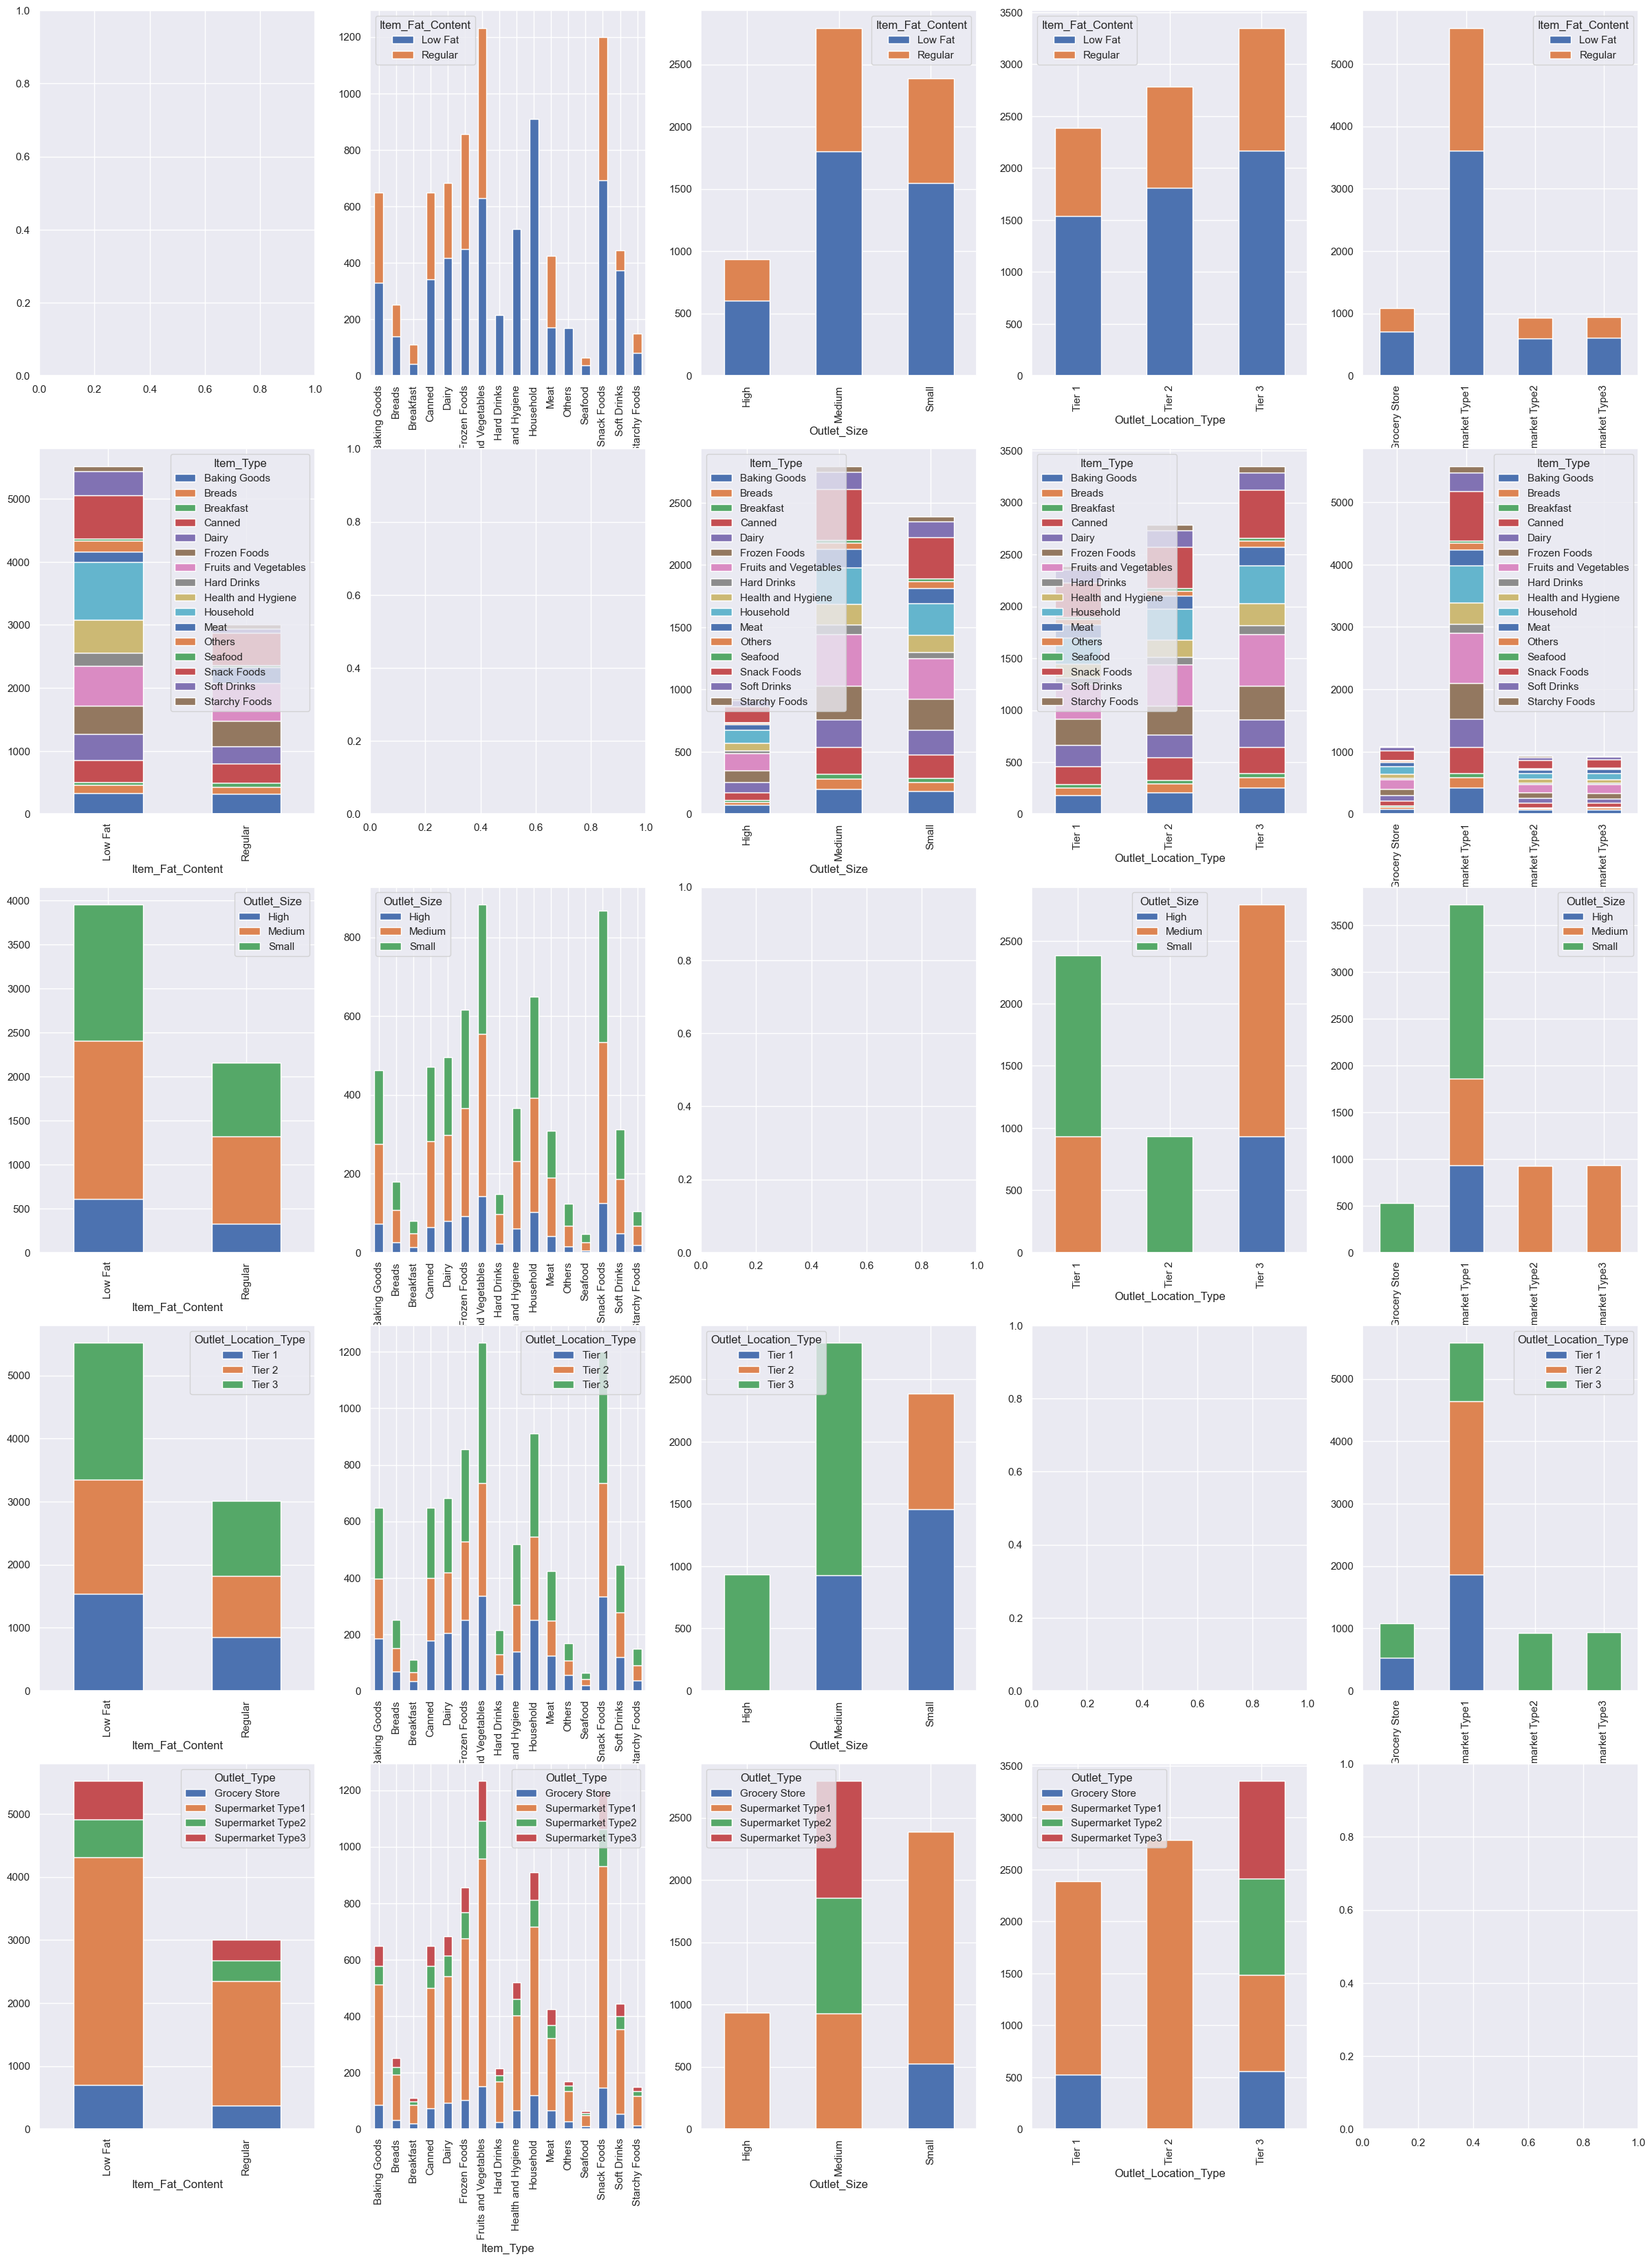

In [56]:
def plot_stacked_bar_cat_to_cat(df, interested_cat_cols):
    sns.set()
    fig, axes = plt.subplots(ncols=len(interested_cat_cols), nrows=len(interested_cat_cols), figsize=(30,40))
    for cat_index_1, cat_col_1 in enumerate(interested_cat_cols):
        for cat_index_2, cat_col_2 in enumerate(interested_cat_cols):
            if (cat_col_1 == cat_col_2): 
                continue
            df_plot = df[interested_cat_cols].groupby([cat_col_1, cat_col_2]).size().\
            reset_index().pivot(columns=cat_col_1, index=cat_col_2, values=0)
            df_plot.plot(kind="bar", stacked=True, ax=axes[cat_index_1][cat_index_2])

interested_cat_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
plot_stacked_bar_cat_to_cat(df, interested_cat_cols)

From those stacked bar plot. We can produce some conclusion. 
- With **Outlet_Size = High** only go with **Outlet_Location_Type = Tier 3** and **Outlet_type = Supermaket Type1**, located in "Supermarket Type 1"
- With **Outlet_Location_Type = Tier 2** then **Outlet_Size = Small**. => So, fill missing Outlet_Size by Small values based on Outlet_Location_Type = Tier 2
- With **Outlet_Type = Supermarket Type2,3** then **Outlet_Size = Medium** => So, this case should fill missing values of Outlet_Size is Medium
- With **Outlet_Type = Supermarket Type2,3** then **Outlet_Location_Type = Tier 3**
- "Supermarket Type1" is dominating "Grocery Store".

In [57]:
#Let quick above assumptions
print("Outlet_Size is High then Outlet_Location_Type",
      df[df["Outlet_Size"]=="High"]["Outlet_Location_Type"].unique())

print("Outlet_Size is High then Outlet_Type: ",
      df[df["Outlet_Size"]=="High"]["Outlet_Type"].unique())

print("Outlet_Location_Type is Tier 2 then Outlet_Size: ",
      df[df["Outlet_Location_Type"]=="Tier 2"]["Outlet_Size"].unique())

print("Outlet_Type in Supermarket Type2,3 then Outlet_Sype: ",
      df[df["Outlet_Type"].isin(["Supermarket Type2", "Supermarket Type3"])]["Outlet_Size"].unique())

Outlet_Size is High then Outlet_Location_Type ['Tier 3']
Outlet_Size is High then Outlet_Type:  ['Supermarket Type1']
Outlet_Location_Type is Tier 2 then Outlet_Size:  [nan 'Small']
Outlet_Type in Supermarket Type2,3 then Outlet_Sype:  ['Medium']


<Axes: xlabel='Outlet_Size', ylabel='count'>

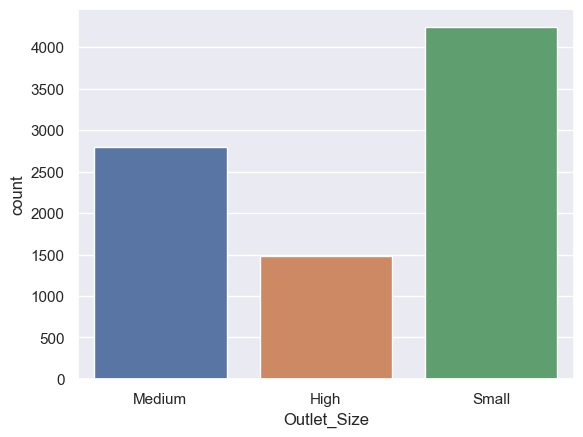

In [58]:
# Fill Outlet_size = Medium when Outlet_Type = Supermarket Type2,3       
df.loc[df["Outlet_Size"].isnull() 
       & (df["Outlet_Location_Type"] == "Tier 2"), 
                                "Outlet_Size"] = "Small"

# Fill the rest of Outlet_Type as High
df.loc[df["Outlet_Size"].isnull(), "Outlet_Size"] = "High"

sns.countplot(x='Outlet_Size', data=df)

### Check abnormal observation Item_Weight

- First, As you can see from boxplot grids in preious cells, median of **Item_Weight** varies depend on **Item_Type**. So that might be simple solution as you can fill missing values of Item_Weight as median group by Item_Type. However, for more eda insight, we should deep dive into data where Item_Weight is missing

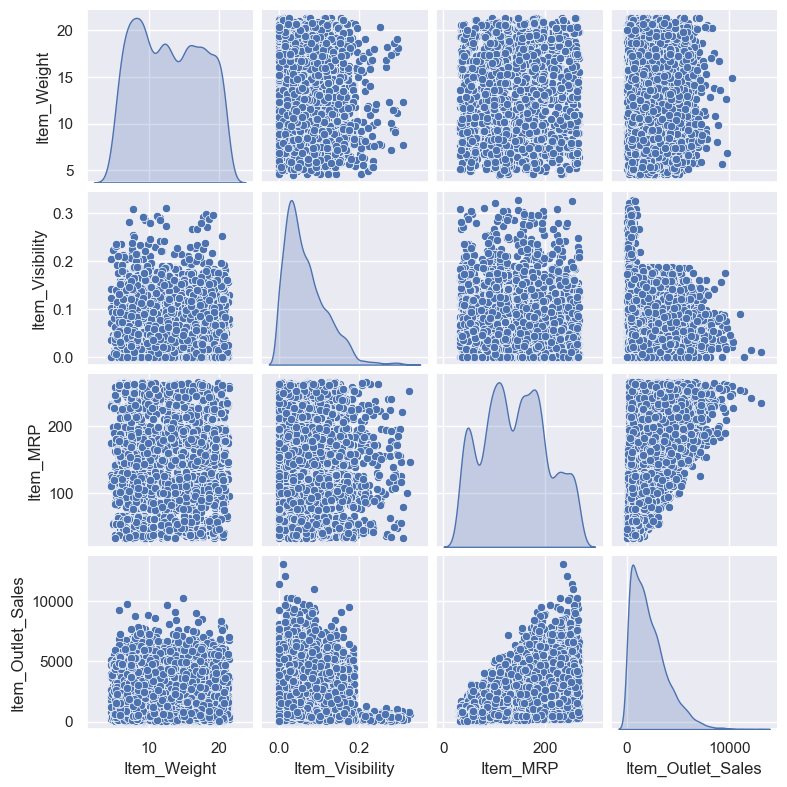

In [59]:
# Check Quant to Quant relationship
sns.set()
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(df[columns], height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [60]:
# Check abnomal column Item_Weight
df_item_weight_null = df[df["Item_Weight"].isnull()]
df_item_weight_null.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [61]:
cat_cols_with_year = cat_cols.copy()
cat_cols_with_year.append("Outlet_Establishment_Year") # because Outlet_Establishment_Year column might be treat as cat col.
for col in cat_cols_with_year:
    print(f"{col}: ", df_item_weight_null[col].unique())

Item_Identifier:  ['FDP10' 'DRI11' 'FDW12' ... 'FDQ58' 'DRG13' 'NCN18']
Item_Fat_Content:  ['Low Fat' 'Regular']
Item_Type:  ['Snack Foods' 'Hard Drinks' 'Baking Goods' 'Canned'
 'Fruits and Vegetables' 'Dairy' 'Frozen Foods' 'Household' 'Breakfast'
 'Soft Drinks' 'Meat' 'Health and Hygiene' 'Starchy Foods' 'Others'
 'Seafood' 'Breads']
Outlet_Identifier:  ['OUT027' 'OUT019']
Outlet_Size:  ['Medium' 'Small']
Outlet_Location_Type:  ['Tier 3' 'Tier 1']
Outlet_Type:  ['Supermarket Type3' 'Grocery Store']
Outlet_Establishment_Year:  [1985]


In [62]:
interested_cols = ["Item_Fat_Content","Outlet_Identifier","Outlet_Size","Outlet_Type"]
df_out027 = df[df["Outlet_Identifier"]=="OUT027"]

for col in interested_cols:
    print(f"{col}: ", df_out027[col].unique())

print("*"*50)

df_out29 = df[df["Outlet_Identifier"]=="OUT019"]
for col in interested_cols:
    print(f"{col}: ", df_out29[col].unique())

Item_Fat_Content:  ['Low Fat' 'Regular']
Outlet_Identifier:  ['OUT027']
Outlet_Size:  ['Medium']
Outlet_Type:  ['Supermarket Type3']
**************************************************
Item_Fat_Content:  ['Low Fat' 'Regular']
Outlet_Identifier:  ['OUT019']
Outlet_Size:  ['Small']
Outlet_Type:  ['Grocery Store']


Okay, With **Outlet_Identifier = "OUT027"**, **then Outlet_Size = "Medium"** and **Outlet_Type = "Supermarket Type3"**. So, let"s plot chart to show relationship between **Item_Fat_Content** and **Item_Weight**. 
Similar with **Outlet_Identifier = "OUT019"**

In [63]:
# Count non-missing values based on figured out related columns
print("Colum has non-null by Outlet_Identifier: ", 
      df[df["Outlet_Identifier"] == "OUT027"]["Item_Weight"].notnull().any())

print("Colum has non-null by Outlet_Size Medium: ",
      df[df["Outlet_Size"] == "Medium"]["Item_Weight"].notnull().any())

print("Colum has non-null by Outlet_Type Supermarket Type3: ",
      df[df["Outlet_Type"] == "Supermarket Type3"]["Item_Weight"].notnull().any())

Colum has non-null by Outlet_Identifier:  False
Colum has non-null by Outlet_Size Medium:  True
Colum has non-null by Outlet_Type Supermarket Type3:  False


In [64]:
# Let calculate means of Item_Weight following relation columns
cols = ["Item_Fat_Content", "Outlet_Size", "Item_Weight", "Item_Type"]
means_of_Item_Weight = df[cols].groupby(["Outlet_Size", "Item_Fat_Content", "Item_Type"]).mean().reset_index()
means_of_Item_Weight

,Outlet_Size,Item_Fat_Content,Item_Type,Item_Weight
0,High,Low Fat,Baking Goods,12.558727
1,High,Low Fat,Breads,12.548261
2,High,Low Fat,Breakfast,12.143000
3,High,Low Fat,Canned,11.851442
4,High,Low Fat,Dairy,13.596296
...,...,...,...,...
79,Small,Regular,Meat,12.458619
80,Small,Regular,Seafood,10.611667
81,Small,Regular,Snack Foods,11.983806
82,Small,Regular,Soft Drinks,10.928226


In [65]:
df_item_weight_filled = pd.merge(df_item_weight_null, means_of_Item_Weight, 
                  how='left', on=["Outlet_Size", "Item_Fat_Content", "Item_Type"])\
                .drop("Item_Weight_x",axis=1)\

df_item_weight_filled.drop_duplicates(subset=["Item_Identifier", "Outlet_Identifier"], inplace=True)

df_filled = pd.merge(df, df_item_weight_filled[["Item_Identifier", "Outlet_Identifier", "Item_Weight_y"]],
                     how='left', on=["Item_Identifier", "Outlet_Identifier"])

df_filled["Item_Weight"] = df_filled.apply(lambda x: x["Item_Weight_y"] if np.isnan(x["Item_Weight"]) else x["Item_Weight"],axis=1)
df_filled.drop("Item_Weight_y", axis=1, inplace=True)


In [66]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Item_Outlet_Sales'}>]], dtype=object)

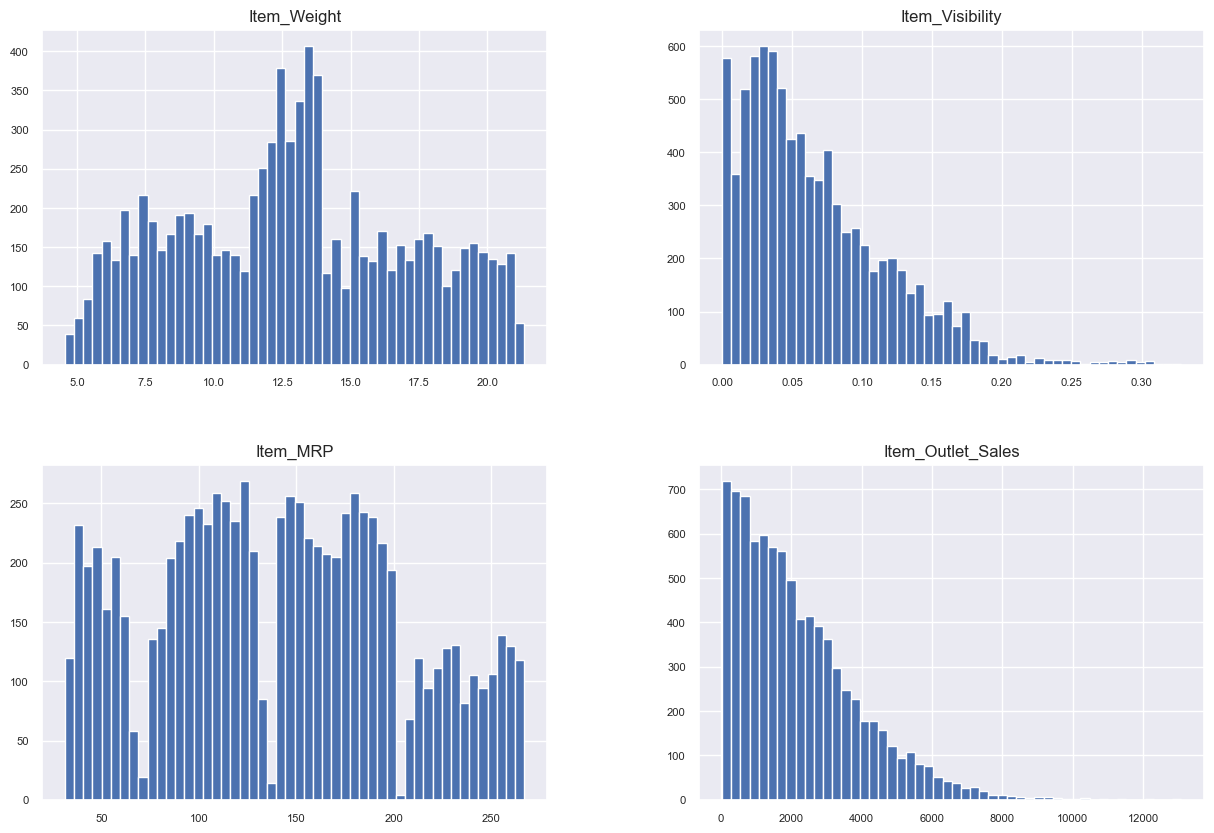

In [67]:
df_filled[["Item_Weight",
    "Item_Visibility",
    "Item_MRP",
    "Item_Outlet_Sales"]].hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [68]:
df_filled.to_csv("eda_convenience_store_brands.csv", index=False)